In [1]:
import tensorflow as tf
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.4.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from saved_class_MultiHeadAttention import MultiHeadAttention
from saved_func_show_heatmaps import show_heatmaps

In [4]:
num_hiddens, num_heads = 100, 5
attention = MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens,
                                   num_hiddens, num_heads, 0.5)

batch_size, num_queries, valid_lens = 2, 4, tf.constant([3, 2])
X = tf.ones((batch_size, num_queries, num_hiddens))
attention(X, X, X, valid_lens, training = False).shape

TensorShape([2, 4, 100])

In [5]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, num_hiddens, dropout, max_len = 1000):
        super().__init__()
        self.dropout = tf.keras.layers.Dropout(dropout)
        # Create a long enough `P`
        self.P = np.zeros((1, max_len, num_hiddens))
        X = np.arange(max_len, dtype = np.float32).reshape(
            -1,1)/np.power(10000, np.arange(0, num_hiddens, 2, dtype = np.float32) / num_hiddens)
        self.P[:, :, 0::2] = np.sin(X)
        self.P[:, :, 1::2] = np.cos(X)
        
    def call(self, X, training):
        X = X + self.P[:, :X.shape[1], :]
        return self.dropout(X, training = training)

In [6]:
encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
X = pos_encoding(tf.zeros((1, num_steps, encoding_dim)), training = False)
P = pos_encoding.P[:, :X.shape[1], :]

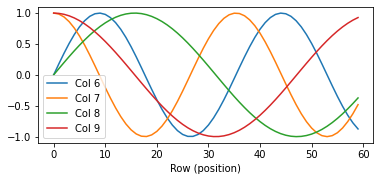

In [7]:
plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(num_steps), P[0, :, 6:10])
plt.xlabel('Row (position)')
plt.legend(labels =["Col %d" % d for d in np.arange(6, 10)])
plt.show()

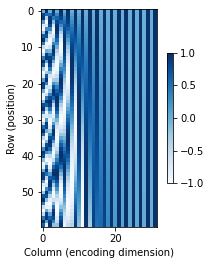

In [8]:
P = tf.expand_dims(tf.expand_dims(P[0, :, :], axis = 0), axis = 0)
show_heatmaps(P, xlabel='Column (encoding dimension)',
              ylabel='Row (position)', figsize=(3.5, 4), cmap='Blues')